<img src="https://i.pinimg.com/564x/53/16/9c/53169c6e718d11fd20a120db45cacede.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# Bike Store Sales Analysis

In this project i'll be analyzing sales made on bike stores.


[Link for the dataset](https://drive.google.com/file/d/13fpprNtRvCem_482DFkuGTxKrhyOVhBV/view?usp=sharing)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Loading the data:

In [2]:
sales = pd.read_csv(r"D:\My Jupyter Notebooks\bike store analysis python\sales_data.csv",
                   parse_dates=['Date'])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Data Overview:

In [3]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [4]:
sales.shape

(113036, 18)

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [6]:
sales.describe()

,Date,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,2014-11-23 12:14:55.063519232,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
min,2011-01-01 00:00:00,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,2013-12-22 00:00:00,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,2014-06-27 00:00:00,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,2016-01-09 00:00:00,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,2016-07-31 00:00:00,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000
std,NaN,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Numerical Analysis:

I'll analyze the `Unit_Cost` column

In [7]:
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [15]:
sales['Unit_Cost'].mean()

267.296365759581

In [16]:
sales['Unit_Cost'].median()

9.0

<Axes: >

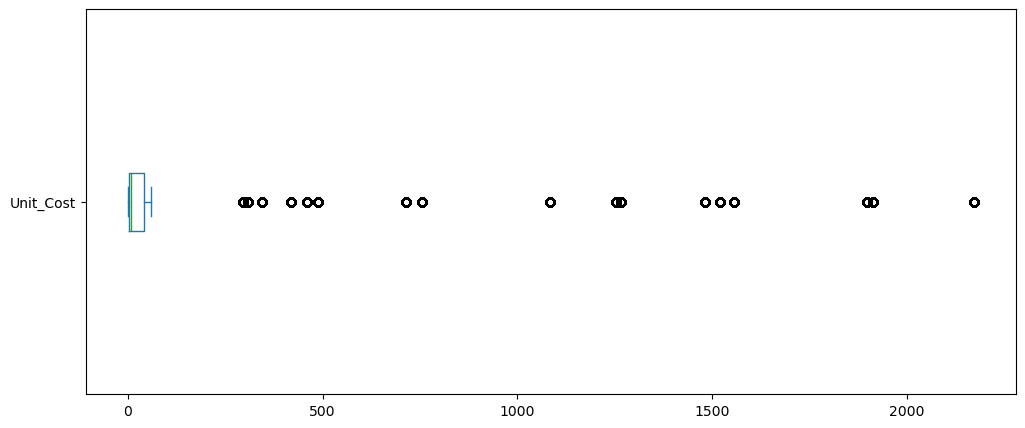

In [24]:
sales['Unit_Cost'].plot(kind='box', vert=False, figsize=(12,5))

<Axes: ylabel='Density'>

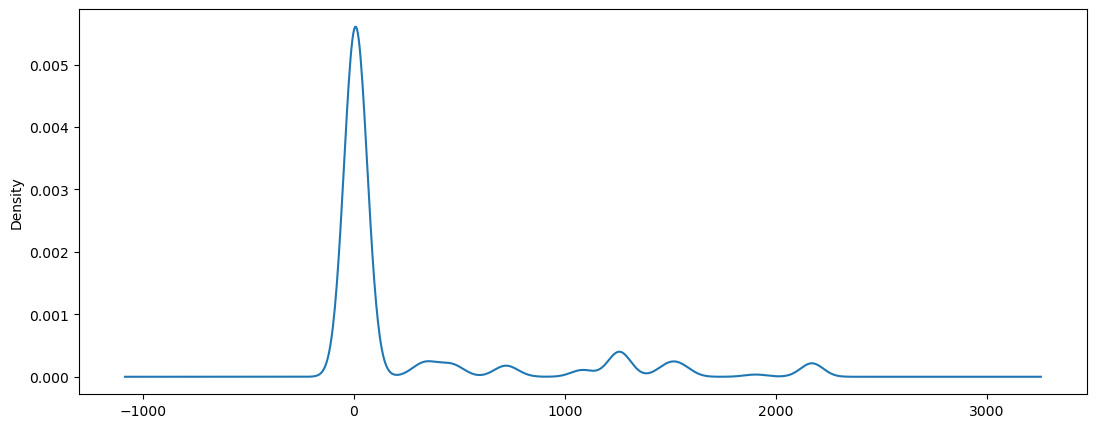

In [8]:
sales['Unit_Cost'].plot(kind='density', figsize=(13,5))

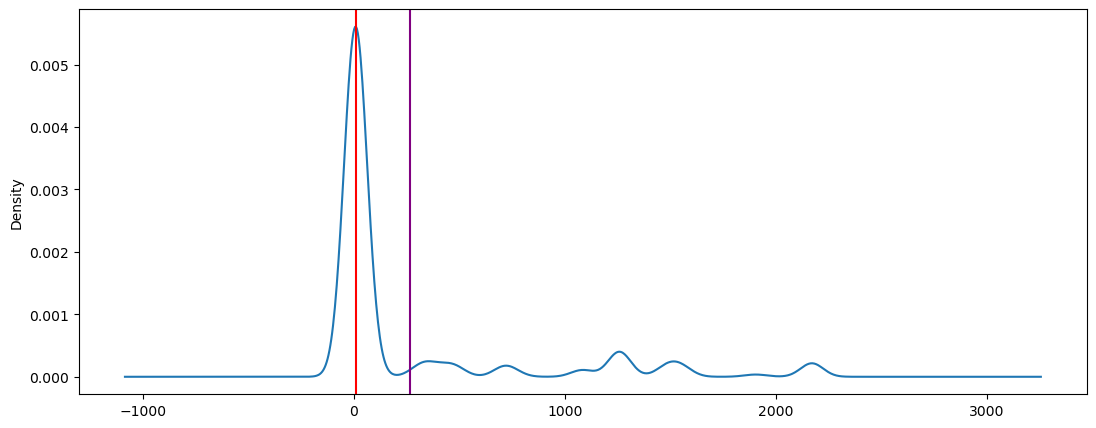

In [30]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(13,5))
ax.axvline(sales['Unit_Cost'].mean(), color='purple')
ax.axvline(sales['Unit_Cost'].median(), color='red')

Text(0.5, 0, 'Dollars')

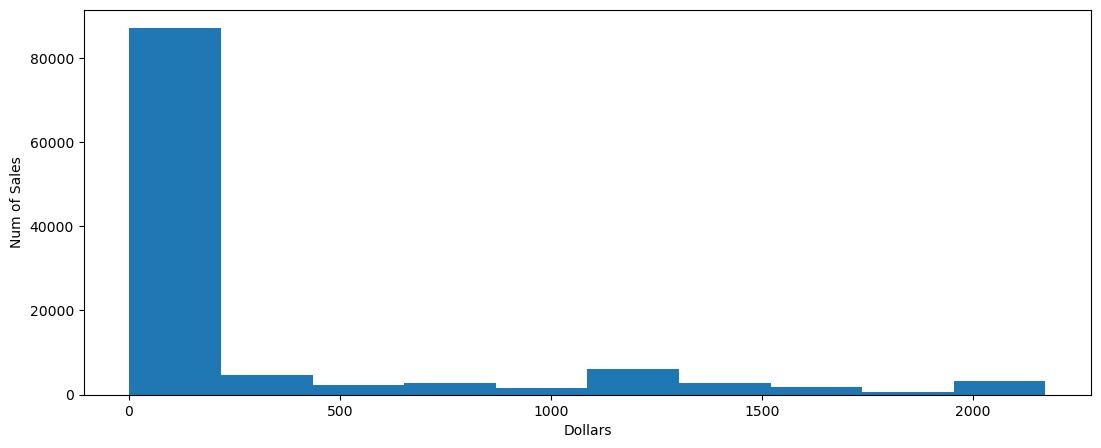

In [9]:
ax = sales['Unit_Cost'].plot(kind='hist', figsize=(13,5))
ax.set_ylabel('Num of Sales')
ax.set_xlabel('Dollars')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Categorical Analysis

I'll analyze the `Age_Group` column:

In [10]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [34]:
sales['Age_Group'].value_counts()

Age_Group
Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: count, dtype: int64

<Axes: ylabel='count'>

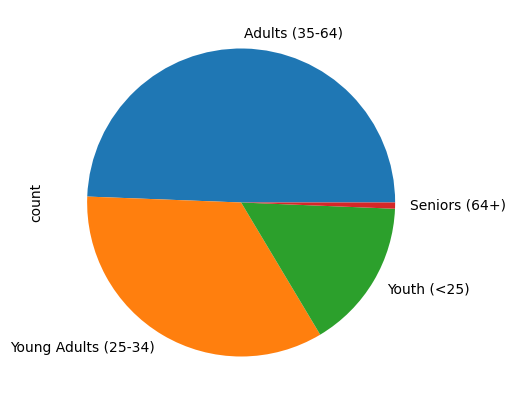

In [11]:
sales['Age_Group'].value_counts().plot(kind='pie', figsize=(5,5))

Text(0, 0.5, 'Num of Sales')

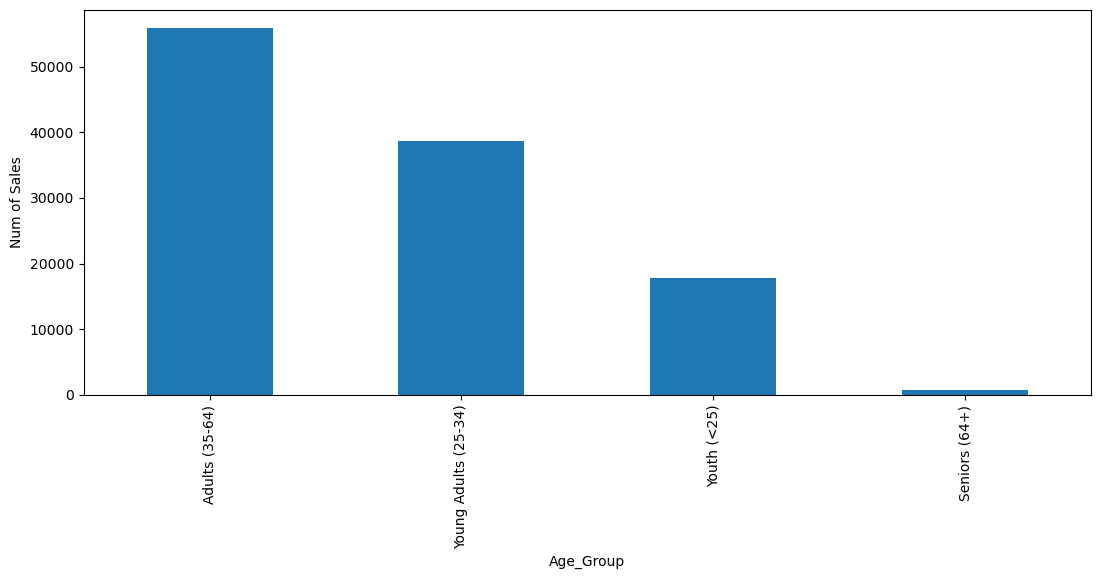

In [12]:
ax = sales['Age_Group'].value_counts().plot(kind='bar', figsize=(13,5))
ax.set_ylabel('Num of Sales')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Relationship between the columns

Can we find any significant relationship?

In [45]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

<Axes: xlabel='Customer_Age', ylabel='Revenue'>

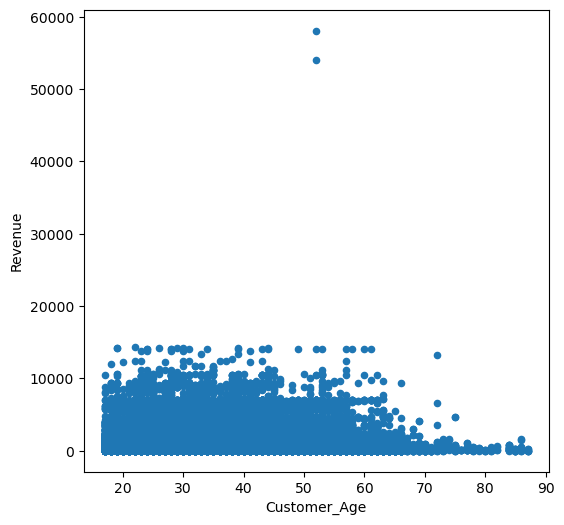

In [49]:
sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6,6))

<Axes: xlabel='Revenue', ylabel='Profit'>

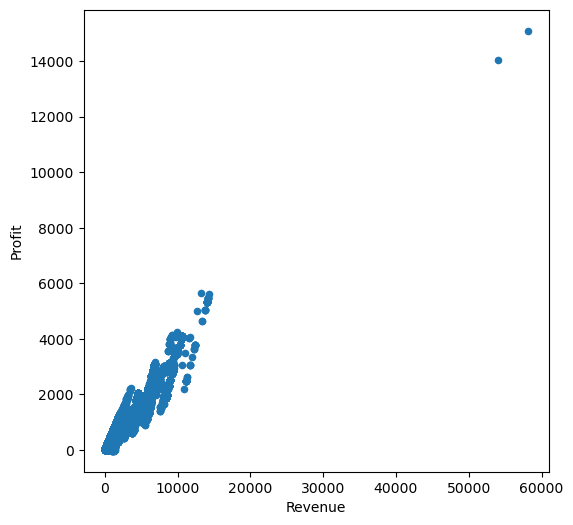

In [52]:
sales.plot(kind='scatter', x='Revenue', y='Profit', figsize=(6,6))

Text(0, 0.5, 'Profit')

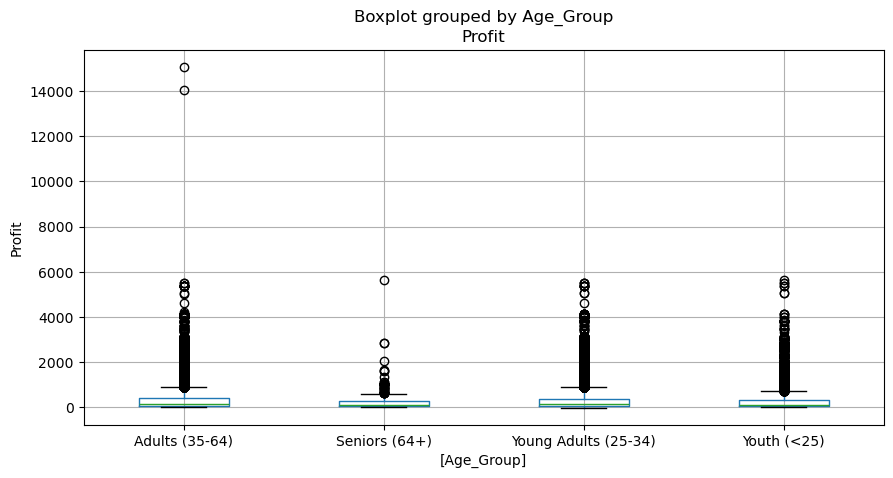

In [54]:
ax = sales[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(10,5))
ax.set_ylabel('Profit')

Year                 Axes(0.125,0.53;0.227941x0.35)
Customer_Age      Axes(0.398529,0.53;0.227941x0.35)
Order_Quantity    Axes(0.672059,0.53;0.227941x0.35)
Unit_Cost            Axes(0.125,0.11;0.227941x0.35)
Unit_Price        Axes(0.398529,0.11;0.227941x0.35)
Profit            Axes(0.672059,0.11;0.227941x0.35)
dtype: object

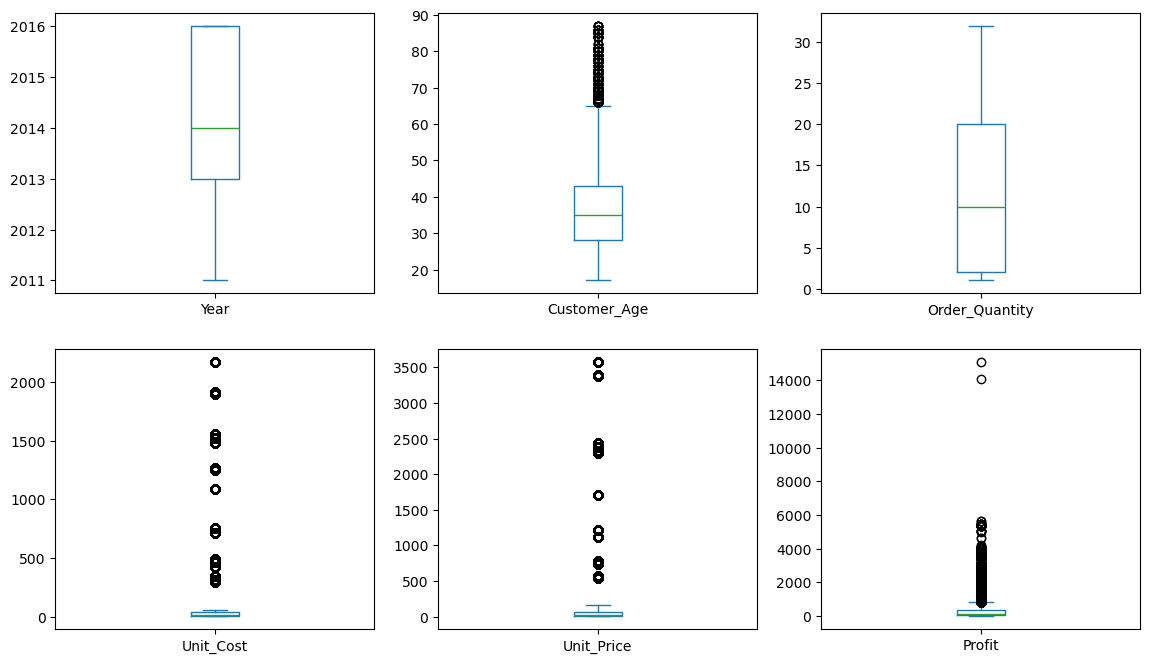

In [56]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']

sales[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Data wrangling

create new columns or modify existing ones.

### Add and calculate a new `Revenue_per_Age` column

In [14]:
sales['Revenue_per_Age'] = sales['Revenue'] / sales['Customer_Age']

sales['Revenue_per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

<Axes: ylabel='Density'>

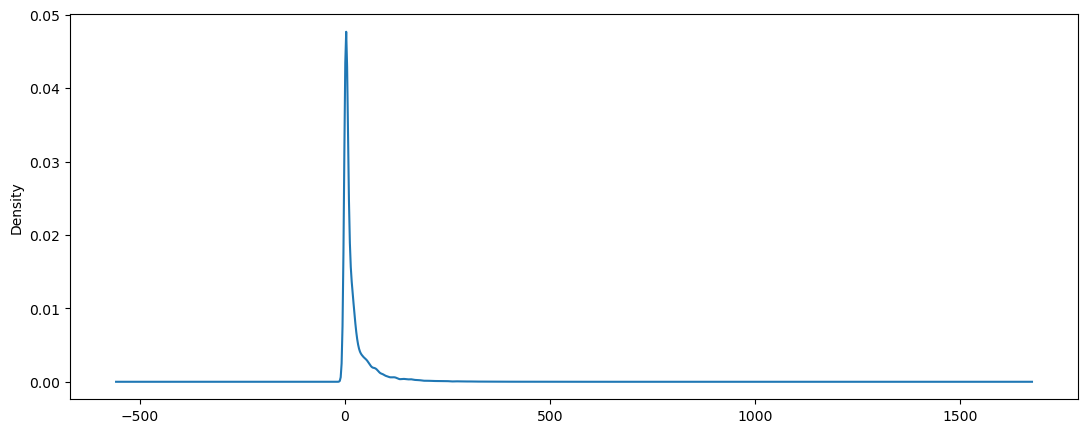

In [15]:
sales['Revenue_per_Age'].plot(kind='density', figsize=(13,5))

<Axes: ylabel='Frequency'>

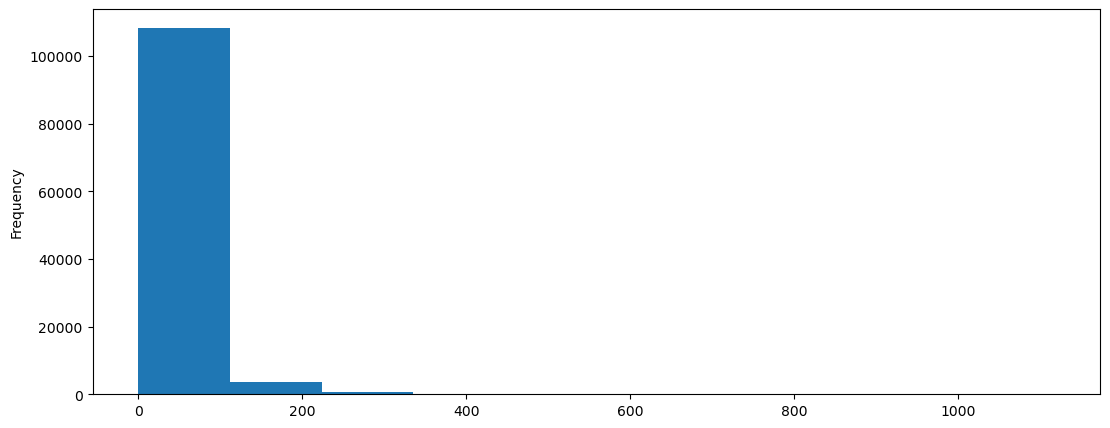

In [16]:
sales['Revenue_per_Age'].plot(kind='hist', figsize=(13,5))

## Add new calculate as Calculated_Cost column

formula:

$$ Calculated\_Cost = Order\_Quantity * Unit\_Cost $$

In [18]:
sales['Calculated_Cost'] = sales['Order_Quantity'] * sales['Unit_Cost']

sales['Calculated_Cost'].head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

<Axes: xlabel='Calculated_Cost', ylabel='Profit'>

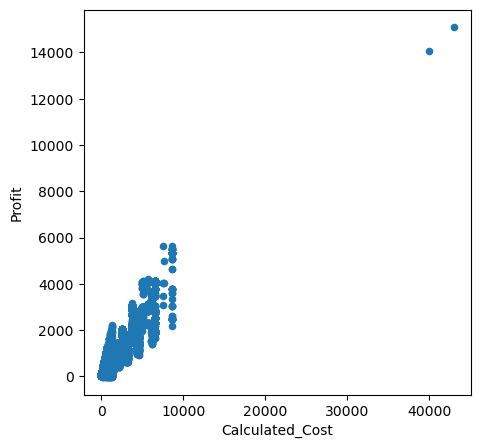

In [19]:
sales.plot(kind='scatter', x='Calculated_Cost', y='Profit', figsize=(5,5))

### Add `Calculated_Revenue` column

formula

$$ Calculated\_Revenue = Cost + Profit $$

In [21]:
sales['Calculated_Revenue'] = sales['Cost'] + sales['Profit']

sales['Calculated_Revenue'].head()

0     950
1     950
2    2401
3    2088
4     418
Name: Calculated_Revenue, dtype: int64

In [22]:
(sales['Calculated_Revenue'] != sales['Revenue']).sum()

0

In [23]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,49.000000,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,42.612245,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4,45,120,238,180,418,8.893617,180,418


<Axes: ylabel='Frequency'>

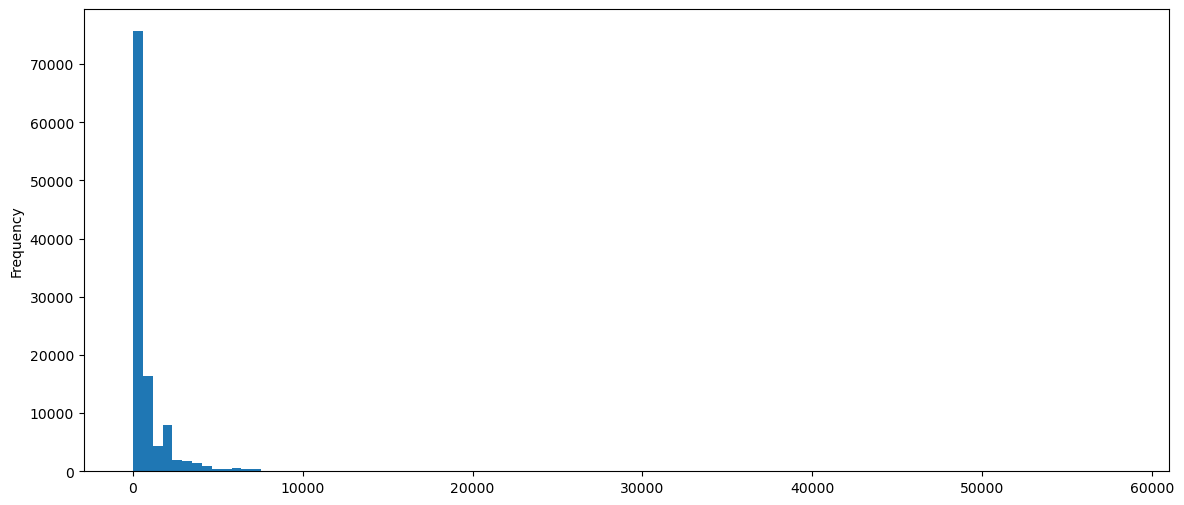

In [26]:
sales['Revenue'].plot(kind='hist', bins=100, figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Selection & Indexing:

### Get the mean revenue of the `Adults (35-64)` sales group

In [29]:
sales.loc[sales['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

### How many records belong to Age Group `Youth (<25)` or `Adults (35-64)`?

In [31]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].shape[0]

73652

### Get the mean revenue of the sales group `Adults (35-64)` in `United States`

In [32]:
sales.loc[(sales['Age_Group'] == 'Adults (35-64)') & (sales['Country'] == 'United States'), 'Revenue'].mean()

726.7260473588342

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)